# SocOpros Survey Data Loader Demo

This notebook demonstrates the `soc_opros_loader` module for analyzing survey data from Google Sheets.

## Features
- 🔄 **Dynamic Structure Handling**: Adapts to variable number of statements and respondents
- 🌐 **Cyrillic Text Support**: Proper encoding for Cyrillic respondent names  
- 📊 **Clean Data Interface**: Structured responses matrix ready for analysis
- 🔗 **Direct Google Sheets Integration**: No authentication required for public sheets

## Data Source
- **Survey**: 'soc opros' worksheet with 265 philosophical/psychological statements
- **Respondents**: 15 participants with Cyrillic names
- **Scale**: 5-point Likert scale (strongly disagree → strongly agree)

In [1]:
import sys
sys.path.append('../src')

from soc_opros_loader import SocOprosLoader, load_soc_opros_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## Method 1: Using the SocOprosLoader Class

The `SocOprosLoader` automatically handles:
- ✅ Proper column name extraction from first data row
- ✅ Cyrillic text encoding (UTF-8) 
- ✅ Dynamic table structure adaptation
- ✅ Clean data matrix with named columns

In [2]:
# Initialize the loader
loader = SocOprosLoader()
print(f"Loader configured for sheet: {loader.sheet_id}")
print(f"Target worksheet: {loader.worksheet_gid}")

Loader configured for sheet: 17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk
Target worksheet: 992488085


In [3]:
# Load the raw data with proper column handling
raw_data = loader.load_data()
print(f"Raw data shape: {raw_data.shape}")
print(f"\nColumn names (Cyrillic respondent names):")
print(raw_data.columns.tolist())
print(f"\nFirst few rows with proper headers:")
raw_data.head()

INFO:soc_opros_loader:Loading data from: https://docs.google.com/spreadsheets/d/17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk/export?format=csv&gid=992488085
INFO:soc_opros_loader:Data loaded successfully with encoding: utf-8 - Shape: (265, 16)
INFO:soc_opros_loader:Column names: ['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']


Raw data shape: (265, 16)

Column names (Cyrillic respondent names):
['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']

First few rows with proper headers:


,statements,Амелия,Итанио,Отец,Ваал,Пик,Стилшейд,ПИПИПИ,Айса,Кель,Иезекиль,Нелот,Иннеад,Джазар,Кая,Айша
0,Life should have an end,strongly agree,agree,strongly agree,strongly disagree,indifferent,disagree,agree,strongly disagree,strongly disagree,agree,agree,disagree,indifferent,strongly disagree,agree
1,You should do whatever you want regardless of ...,strongly disagree,disagree,indifferent,agree,disagree,disagree,disagree,strongly disagree,agree,disagree,strongly disagree,agree,agree,agree,strongly agree
2,It is good to be alive,strongly agree,agree,indifferent,agree,strongly agree,strongly agree,agree,strongly agree,strongly agree,indifferent,indifferent,agree,strongly agree,disagree,strongly agree
3,Existing is good,agree,disagree,indifferent,strongly agree,strongly agree,strongly agree,agree,strongly agree,strongly agree,indifferent,indifferent,strongly agree,strongly agree,disagree,strongly agree
4,You consider yourself happy,agree,disagree,agree,disagree,indifferent,disagree,disagree,strongly agree,agree,agree,indifferent,strongly agree,agree,disagree,strongly agree


In [4]:
# Parse the survey structure
structure = loader.parse_structure()
print("Survey Structure:")
for key, value in structure.items():
    if isinstance(value, list) and len(value) > 3:
        print(f"  {key}: {value[:3]}... ({len(value)} total)")
    else:
        print(f"  {key}: {value}")

INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents


Survey Structure:
  total_statements: 265
  total_respondents: 15
  data_shape: (265, 16)
  statements_preview: ['Life should have an end', 'You should do whatever you want regardless of consequences', 'It is good to be alive']
  respondents_preview: ['Амелия', 'Итанио', 'Отец']


In [5]:
# Get the clean responses matrix
responses = loader.get_responses_matrix()
print(f"Responses matrix shape: {responses.shape}")
print(f"\nSample responses:")
responses.iloc[:5, :5]

INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents
INFO:soc_opros_loader:Filling 402 missing values with neutral response (3.0)
INFO:soc_opros_loader:Responses matrix created - Shape: (265, 15)


Responses matrix shape: (265, 15)

Sample responses:


,Амелия,Итанио,Отец,Ваал,Пик
Life should have an end,5.0,4.0,5.0,1.0,3.0
You should do whatever you want regardless of consequences,1.0,2.0,3.0,4.0,2.0
It is good to be alive,5.0,4.0,3.0,4.0,5.0
Existing is good,4.0,2.0,3.0,5.0,5.0
You consider yourself happy,4.0,2.0,4.0,2.0,3.0


## Explore Survey Content

In [6]:
# Get survey statements
statements = loader.get_statements()
print(f"Total statements: {len(statements)}")
print("\nFirst 10 statements:")
for i, stmt in enumerate(statements[:10], 1):
    print(f"{i:2d}. {stmt}")

Total statements: 265

First 10 statements:
 1. Life should have an end
 2. You should do whatever you want regardless of consequences
 3. It is good to be alive
 4. Existing is good
 5. You consider yourself happy
 6. You should rely on fate
 7. Gold is more important than honor
 8. Forbidden knowledge/powers is worth using if it brings advantage
 9. The gods deserve respect and obedience
10. Violence is a valid solution to ANY problem


In [7]:
# Get respondent information with proper Cyrillic support
respondents = loader.get_respondents()
print(f"Total respondents: {len(respondents)}")
print(f"\nRespondent names:")
for i, name in enumerate(respondents, 1):
    print(f"  {i:2d}. {name}")

Total respondents: 15

Respondent names:
   1. Амелия
   2. Итанио
   3. Отец
   4. Ваал
   5. Пик
   6. Стилшейд
   7. ПИПИПИ
   8. Айса
   9. Кель
  10. Иезекиль
  11. Нелот
  12. Иннеад
  13. Джазар
  14. Кая
  15. Айша


## Response Analysis

In [8]:
# Get response summary
summary = loader.get_response_summary()
print("Response Summary:")
for key, value in summary.items():
    if key == 'response_frequencies':
        print(f"  {key}:")
        for resp, count in sorted(value.items(), key=lambda x: x[1], reverse=True):
            print(f"    {resp}: {count}")
    elif key == 'unique_response_values':
        likert_responses = [v for v in value if v in ['strongly agree', 'agree', 'indifferent', 'disagree', 'strongly disagree']]
        print(f"  Likert scale responses: {likert_responses}")
    else:
        print(f"  {key}: {value}")

Response Summary:
  total_responses: 3975
  non_null_responses: 3975
  Likert scale responses: []
  response_frequencies:
    4.0: 1262
    2.0: 1017
    3.0: 918
    5.0: 539
    1.0: 239
  completion_rate: 100.0
  statements_count: 265
  respondents_count: 15


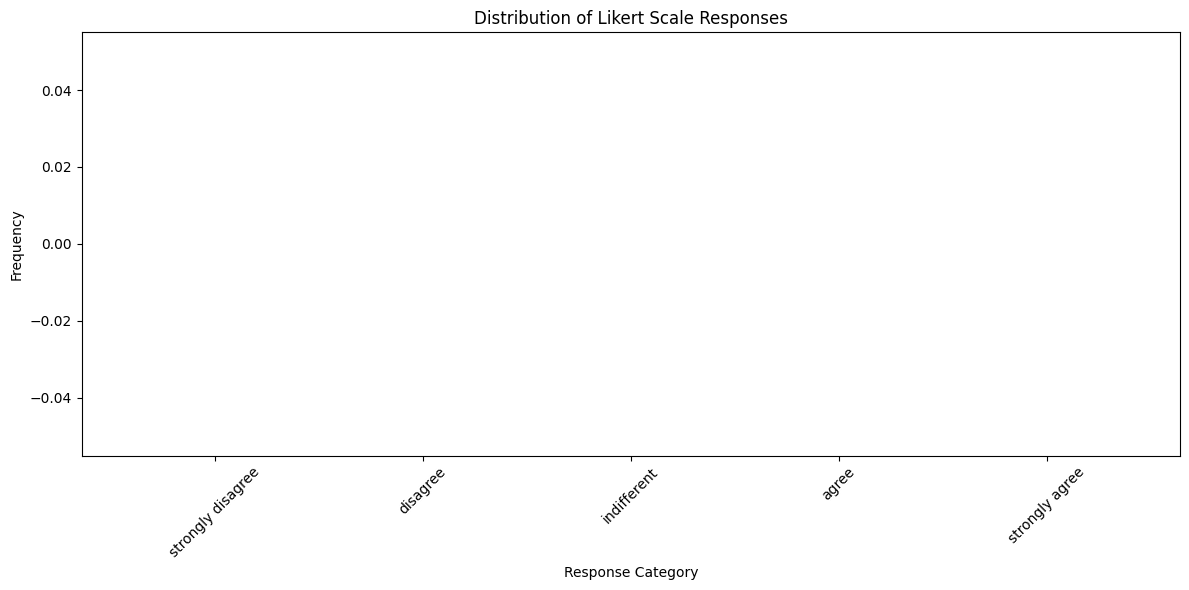


Total Likert responses: 0
Completion rate: 100.0%


In [9]:
# Visualize response distribution
plt.figure(figsize=(12, 6))

# Filter for Likert scale responses only
likert_responses = ['strongly disagree', 'disagree', 'indifferent', 'agree', 'strongly agree']
likert_counts = {resp: summary['response_frequencies'].get(resp, 0) for resp in likert_responses}

plt.bar(likert_counts.keys(), likert_counts.values())
plt.title('Distribution of Likert Scale Responses')
plt.xlabel('Response Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nTotal Likert responses: {sum(likert_counts.values())}")
print(f"Completion rate: {summary['completion_rate']:.1f}%")

## Method 2: Using the Convenience Function

In [10]:
# Load data using the convenience function
responses_quick, structure_quick = load_soc_opros_data()

print(f"Quick load - Responses: {responses_quick.shape}")
print(f"Quick load - Structure: {structure_quick['total_statements']} statements, {structure_quick['total_respondents']} respondents")

INFO:soc_opros_loader:Loading data from: https://docs.google.com/spreadsheets/d/17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk/export?format=csv&gid=992488085
INFO:soc_opros_loader:Data loaded successfully with encoding: utf-8 - Shape: (265, 16)
INFO:soc_opros_loader:Column names: ['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']
INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents
INFO:soc_opros_loader:Filling 402 missing values with neutral response (3.0)
INFO:soc_opros_loader:Responses matrix created - Shape: (265, 15)
INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents


Quick load - Responses: (265, 15)
Quick load - Structure: 265 statements, 15 respondents


## Export Clean Data

In [11]:
# Export data for further analysis
clean_data = loader.export_clean_data('dataframe')
print(f"Clean data exported: {clean_data.shape}")

# You can now use this data for advanced analysis
print("\nReady for analysis!")
print(f"- {len(statements)} survey statements")
print(f"- {len(respondents)} respondents")
print(f"- {summary['non_null_responses']} valid responses")
print(f"- {len(likert_responses)} Likert scale categories")

Clean data exported: (265, 15)

Ready for analysis!
- 265 survey statements
- 15 respondents
- 3975 valid responses
- 5 Likert scale categories


## Next Steps

With the data loaded using `soc_opros_loader`, you can:

1. **Advanced Analysis**: Perform correlation analysis, factor analysis, or clustering
2. **Visualizations**: Create heatmaps, distribution plots, or response patterns
3. **Statistical Tests**: Run significance tests or compare group responses
4. **Export**: Save processed data in various formats for other tools

The module automatically handles:
- Variable table structures
- Dynamic statement and respondent counts
- Data cleaning and validation
- Error handling and fallbacks